In [1]:
import cavendish.utils.Dataloader as dl

C:\Users\casey\advanced_exp\cavendish\utils\Functions.py:21: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return theta0 + amp*np.sin((2(np.pi)/period)*time+delta)*np.exp(-b*time)


In [2]:

import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
print(os.getcwd())

c:\Users\casey\advanced_exp\FAFO


In [4]:


dfs = dl.load_convert("../Databases/Cavendish-Experiment-PHY64-In-person-data.csv")

In [15]:
display(dfs[0].head())
display(dfs[1].head())
display(dfs[2].head())
display(dfs[3].head())

Measurement 1                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.000314          0.000235
1            20 -0.001594          0.000236
2            40 -0.004833          0.000240
3            60 -0.008749          0.000246
4            80 -0.013115          0.000256

Measurement 2                            
     Time (sec)   Radians Uncertainty (rad)
0           0.0 -0.011309          0.000252
1          20.0 -0.010179          0.000249
2          40.0 -0.008372          0.000245
3          60.0 -0.006415          0.000242
4          80.0 -0.004984          0.000240

Measurement 3                            
     Time (sec)   Radians Uncertainty (rad)
0             0  0.000514          0.000235
1            20 -0.000163          0.000235
2            40 -0.002875          0.000237
3            60 -0.007243          0.000243
4            80 -0.011986          0.000253

Measurement 4                            
     Time (sec)   Radians Uncertainty (rad)
0           0.0 -0.011760          0.000253
1          20.0 -0.010782          0.000250
2          40.0 -0.009125          0.000247
3          60.0 -0.007017          0.000243
4          80.0 -0.005059          0.000240

In [23]:
dfs1 = dfs[0]['Measurement 1']
time1 = np.array(dfs[0]['Measurement 1','Time (sec)'])
radians1 = np.array(dfs[0]['Measurement 1','Radians'])
position1 = np.array(dfs[0]['Measurement 1','Radians'])
uncertainties1 = np.array(dfs[0]['Measurement 1','Uncertainty (rad)'])




dfs2 = dfs[1]['Measurement 2']
time2 = np.array(dfs[1]['Measurement 2','Time (sec)'])
radians2 = np.array(dfs[1]['Measurement 2','Radians'])
position2 = np.array(dfs[1]['Measurement 2','Radians'])
uncertainties2 = np.array(dfs[1]['Measurement 2','Uncertainty (rad)'])

dfs3 = dfs[2]['Measurement 3']
time3 = np.array(dfs[2]['Measurement 3','Time (sec)'])
radians3 = np.array(dfs[2]['Measurement 3','Radians'])
position3 = np.array(dfs[2]['Measurement 3','Radians'])
uncertainties3 = np.array(dfs[2]['Measurement 3','Uncertainty (rad)'])

dfs4 = dfs[3]['Measurement 4']
time4 = np.array(dfs[3]['Measurement 4','Time (sec)'])
radians4 = np.array(dfs[3]['Measurement 4','Radians'])
position4 = np.array(dfs[3]['Measurement 4','Radians'])
uncertainties4 = np.array(dfs[3]['Measurement 4','Uncertainty (rad)'])

In [24]:
theta1 = 74.66
theta2 = 77.13
theta3 = 74.63
theta4 = 77.09
# time3 = np.array(time3, dtype=float)
# position3 = np.array(position3, dtype=float)


In [25]:


def damped_oscillation(time, theta0, period,amp,delta, b):
    """
    Function to be fit to the data. operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of osscilations
    period (_float_):
    delta (_float_): 
    b (_float_)
    """
    return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)



$\theta = 0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$

In [27]:

plt.figure(figsize=(12, 6))

def damped_oscillation(time, theta0, period, amp, delta, b):
    return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)


# Fit the curve using uncertainties
p1, cov1 = curve_fit(damped_oscillation, time1, position1, sigma=uncertainties1, absolute_sigma=True, p0=[theta1, 240, 0.095, 0.01, 0.01])
p2, cov2 = curve_fit(damped_oscillation, time2, position2, sigma=uncertainties2, absolute_sigma=True, p0=[theta2, 240, 0.095, 0.01, 0.01])
p3, cov3 = curve_fit(damped_oscillation, time3, position3, sigma=uncertainties3, absolute_sigma=True, p0=[theta3, 240, 0.095, 0.01, 0.01])
p4, cov4 = curve_fit(damped_oscillation, time4, position4, sigma=uncertainties4, absolute_sigma=True, p0=[theta4, 240, 0.095, 0.01, 0.01])

# Calculate the uncertainties (standard deviations) of the fitted parameters
param_uncertainties1 = np.sqrt(np.diag(cov1))
param_uncertainties2 = np.sqrt(np.diag(cov2))
param_uncertainties3 = np.sqrt(np.diag(cov3))
param_uncertainties4 = np.sqrt(np.diag(cov4))



C:\Users\casey\AppData\Local\Temp\ipykernel_23772\2208847061.py:4: RuntimeWarning: overflow encountered in exp
  return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)


<Figure size 1200x600 with 0 Axes>

Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters:
  theta0 = -0.00935 ± 0.00004
  period = 241.51749 ± 0.37140
  amp = -0.00909 ± 0.00013
  delta = -1.61581 ± 0.01526
  b = 0.00132 ± 0.00004
ight) \cdot e^{-0.00132 \pm 0.00004 t}$0.00004 + -0.00909 \pm 0.00013 \cdot \sin\left(rac{2\pi}{241.51749} t + -1.61581 \pm 0.01526


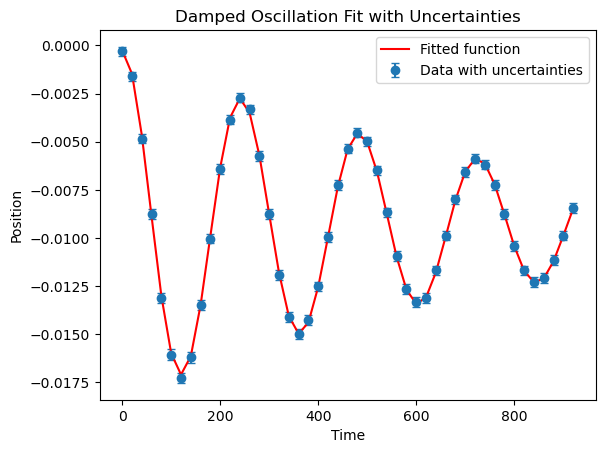

In [28]:
# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p1[0]:.5f} ± {param_uncertainties1[0]:.5f}")
print(f"  period = {p1[1]:.5f} ± {param_uncertainties1[1]:.5f}")
print(f"  amp = {p1[2]:.5f} ± {param_uncertainties1[2]:.5f}")
print(f"  delta = {p1[3]:.5f} ± {param_uncertainties1[3]:.5f}")
print(f"  b = {p1[4]:.5f} ± {param_uncertainties1[4]:.5f}")

# Print the fitted function in LaTeX
fitted_function_latex1 = (f"${p1[0]:.5f} \pm {param_uncertainties1[0]:.5f} + "
                         f"{p1[2]:.5f} \pm {param_uncertainties1[2]:.5f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p1[1]:.5f}}} t + {p1[3]:.5f} \pm {param_uncertainties1[3]:.5f}\right) "
                         f"\cdot e^{{-{p1[4]:.5f} \pm {param_uncertainties1[4]:.5f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex1}")

# Plot the data with error bars
plt.errorbar(time1, position1, yerr=uncertainties1, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time1, damped_oscillation(time1, *p1), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters:
  theta0 = -0.00739 ± 0.00004
  period = 240.41316 ± 0.90445
  amp = 0.00378 ± 0.00013
  delta = -1.30417 ± 0.03554
  b = 0.00144 ± 0.00010
ight) \cdot e^{-0.00144 \pm 0.00010 t}$0.00004 + 0.00378 \pm 0.00013 \cdot \sin\left(rac{2\pi}{241.51749} t + -1.30417 \pm 0.03554


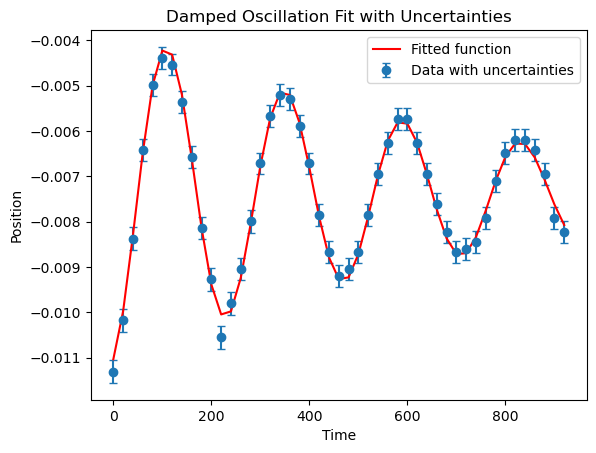

In [29]:

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p2[0]:.5f} ± {param_uncertainties2[0]:.5f}")
print(f"  period = {p2[1]:.5f} ± {param_uncertainties2[1]:.5f}")
print(f"  amp = {p2[2]:.5f} ± {param_uncertainties2[2]:.5f}")
print(f"  delta = {p2[3]:.5f} ± {param_uncertainties2[3]:.5f}")
print(f"  b = {p2[4]:.5f} ± {param_uncertainties2[4]:.5f}")

# Print the fitted function in LaTeX
fitted_function_latex2 = (f"${p2[0]:.5f} \pm {param_uncertainties2[0]:.5f} + "
                         f"{p2[2]:.5f} \pm {param_uncertainties2[2]:.5f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p1[1]:.5f}}} t + {p2[3]:.5f} \pm {param_uncertainties2[3]:.5f}\right) "
                         f"\cdot e^{{-{p2[4]:.5f} \pm {param_uncertainties2[4]:.5f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex2}")

# Plot the data with error bars
plt.errorbar(time2, position2, yerr=uncertainties2, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time2, damped_oscillation(time2, *p2), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()

Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters:
  theta0 = -0.00946 ± 0.00004
  period = 241.35471 ± 0.33248
  amp = -0.01011 ± 0.00012
  delta = -1.80505 ± 0.01383
  b = 0.00129 ± 0.00003
ight) \cdot e^{-0.00132 \pm 0.00004 t}$0.00004 + -0.01011 \pm 0.00012 \cdot \sin\left(rac{2\pi}{241.35471} t + -1.80505 \pm 0.01383


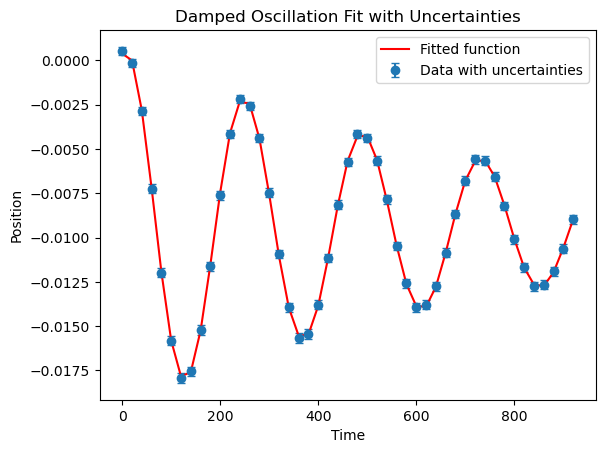

In [30]:

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p3[0]:.5f} ± {param_uncertainties3[0]:.5f}")
print(f"  period = {p3[1]:.5f} ± {param_uncertainties3[1]:.5f}")
print(f"  amp = {p3[2]:.5f} ± {param_uncertainties3[2]:.5f}")
print(f"  delta = {p3[3]:.5f} ± {param_uncertainties3[3]:.5f}")
print(f"  b = {p3[4]:.5f} ± {param_uncertainties3[4]:.5f}")

# Print the fitted function in LaTeX
fitted_function_latex3 = (f"${p3[0]:.5f} \pm {param_uncertainties3[0]:.5f} + "
                         f"{p3[2]:.5f} \pm {param_uncertainties3[2]:.5f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p3[1]:.5f}}} t + {p3[3]:.5f} \pm {param_uncertainties3[3]:.5f}\right) "
                         f"\cdot e^{{-{p1[4]:.5f} \pm {param_uncertainties1[4]:.5f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex3}")

# Plot the data with error bars
plt.errorbar(time3, position3, yerr=uncertainties3, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time3, damped_oscillation(time3, *p3), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()

Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters:
  theta0 = -0.00739 ± 0.00004
  period = 241.42847 ± 0.75519
  amp = 0.00437 ± 0.00013
  delta = -1.43346 ± 0.03067
  b = 0.00133 ± 0.00008
ight) \cdot e^{-0.00133 \pm 0.00008 t}$0.00004 + 0.00437 \pm 0.00013 \cdot \sin\left(rac{2\pi}{241.42847} t + -1.43346 \pm 0.03067


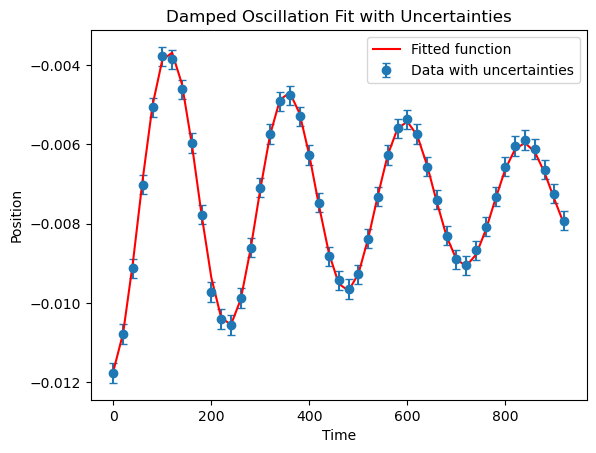

In [31]:

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p4[0]:.5f} ± {param_uncertainties4[0]:.5f}")
print(f"  period = {p4[1]:.5f} ± {param_uncertainties4[1]:.5f}")
print(f"  amp = {p4[2]:.5f} ± {param_uncertainties4[2]:.5f}")
print(f"  delta = {p4[3]:.5f} ± {param_uncertainties4[3]:.5f}")
print(f"  b = {p4[4]:.5f} ± {param_uncertainties4[4]:.5f}")

# Print the fitted function in LaTeX
fitted_function_latex4 = (f"${p4[0]:.5f} \pm {param_uncertainties4[0]:.5f} + "
                         f"{p4[2]:.5f} \pm {param_uncertainties4[2]:.5f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p4[1]:.5f}}} t + {p4[3]:.5f} \pm {param_uncertainties4[3]:.5f}\right) "
                         f"\cdot e^{{-{p4[4]:.5f} \pm {param_uncertainties4[4]:.5f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex4}")

# Plot the data with error bars
plt.errorbar(time4, position4, yerr=uncertainties4, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time4, damped_oscillation(time4, *p4), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()